In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [141]:
df1=pd.read_csv('/content/US Police shootings in from 2015-22.csv')

In [142]:
df1.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [143]:
df1.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [144]:
df1.count()

id                         7682
name                       7275
date                       7682
manner_of_death            7682
armed                      7473
age                        7210
gender                     7663
race                       6244
city                       7682
state                      7682
signs_of_mental_illness    7682
threat_level               7682
flee                       6819
body_camera                7682
longitude                  6847
latitude                   6847
is_geocoding_exact         7682
dtype: int64

In [145]:
df1.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                         472
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

In [146]:
#since the names are null and we just can't give some random values for unknown names, so I'll just assign Unknown name
df1['name'] = df1['name'].fillna('Unknown')

In [147]:
df1['name'].isnull().sum()

0

In [148]:
df1['armed'].nunique()

103

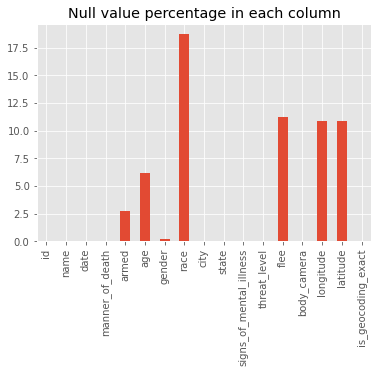

In [149]:
nullPercentage = df1.isnull().sum()/df1.shape[0]*100
nullPercentage.plot(kind='bar')
plt.title("Null value percentage in each column")
plt.show()

In [150]:
df1['race'].nunique()

6

In [151]:
df1['race'].fillna('Other', inplace=True)

In [152]:
df1['race'].describe()

count     7682
unique       7
top          W
freq      3183
Name: race, dtype: object

In [153]:
df1['city'].mode()

0    Los Angeles
dtype: object

In [154]:
df1['city'].nunique()

3142

In [155]:
df1.duplicated().sum()

0

In [156]:
df1['state'].nunique()

51

In [157]:
#taking 2 fields so that I can use -count() on it
stateAndDate = df1[['date','state']]
stateList = [i for i in stateAndDate['state']]

In [158]:
stateCounts = []
for state in df1['state'].unique():
    stateCounts.append([stateList.count(state),state])
print(stateCounts)

[[208, 'WA'], [125, 'OR'], [71, 'KS'], [1110, 'CA'], [278, 'CO'], [211, 'OK'], [349, 'AZ'], [47, 'IA'], [159, 'PA'], [690, 'TX'], [219, 'OH'], [154, 'LA'], [48, 'MT'], [88, 'UT'], [109, 'AR'], [155, 'IL'], [124, 'NV'], [165, 'NM'], [86, 'MN'], [198, 'MO'], [134, 'VA'], [87, 'NJ'], [140, 'IN'], [141, 'KY'], [54, 'MA'], [22, 'NH'], [493, 'FL'], [62, 'ID'], [107, 'MD'], [38, 'NE'], [129, 'MI'], [289, 'GA'], [208, 'TN'], [218, 'NC'], [52, 'AK'], [140, 'NY'], [33, 'ME'], [145, 'AL'], [98, 'MS'], [115, 'WI'], [124, 'SC'], [17, 'DE'], [24, 'DC'], [71, 'WV'], [37, 'HI'], [25, 'WY'], [18, 'ND'], [22, 'CT'], [27, 'SD'], [12, 'VT'], [6, 'RI']]


In [159]:
stateCounts.sort(reverse=True)

In [160]:
print(stateCounts)

[[1110, 'CA'], [690, 'TX'], [493, 'FL'], [349, 'AZ'], [289, 'GA'], [278, 'CO'], [219, 'OH'], [218, 'NC'], [211, 'OK'], [208, 'WA'], [208, 'TN'], [198, 'MO'], [165, 'NM'], [159, 'PA'], [155, 'IL'], [154, 'LA'], [145, 'AL'], [141, 'KY'], [140, 'NY'], [140, 'IN'], [134, 'VA'], [129, 'MI'], [125, 'OR'], [124, 'SC'], [124, 'NV'], [115, 'WI'], [109, 'AR'], [107, 'MD'], [98, 'MS'], [88, 'UT'], [87, 'NJ'], [86, 'MN'], [71, 'WV'], [71, 'KS'], [62, 'ID'], [54, 'MA'], [52, 'AK'], [48, 'MT'], [47, 'IA'], [38, 'NE'], [37, 'HI'], [33, 'ME'], [27, 'SD'], [25, 'WY'], [24, 'DC'], [22, 'NH'], [22, 'CT'], [18, 'ND'], [17, 'DE'], [12, 'VT'], [6, 'RI']]


**It can be noted that more number of incidents happen in California.**

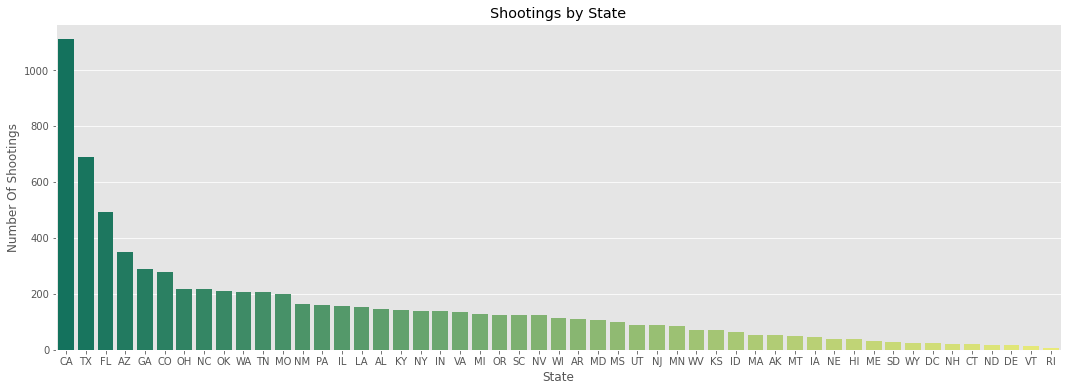

In [161]:
# a plot for states vs number of incidents is plotted here
import seaborn as sns
x = [i[1] for i in stateCounts]
y = [i[0] for i in stateCounts]

plt.figure(figsize=(18,6))
sns.barplot(x=x,y=y,palette='summer')
plt.xlabel(xlabel = 'State')
plt.ylabel(ylabel = 'Number Of Shootings')
plt.title(label = 'Shootings by State')
plt.show()

## From the above plot it is very clear that, California has the highest incidents happening and is followed by Texas.

### Distribution of Age

In [162]:
import plotly.graph_objects as pgo
fig = pgo.Figure(pgo.Box(y=df1['age'],name="Age"))
fig.update_layout(title="Distribution of Age")
fig.show()

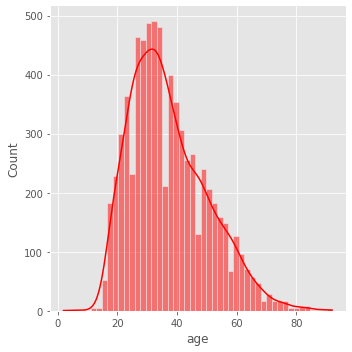

In [163]:
sns.displot(df1['age'],kde=True,color='r')

## **Below is an interactive map that has age of the person involved**

---



In [164]:
df1['age'] = df1['age'].fillna(df1['age'].mean())

In [165]:
conditions = [
    (df1['age'] <= 18),
    (df1['age'] > 18) & (df1['age'] <= 40),
    (df1['age'] > 40) & (df1['age'] <= 60),
    (df1['age'] > 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Age less than 18', 'Age between 18 and 40', 'Age between 40 and 60', 'Age greater than 60']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['Age_of_the_Person'] = np.select(conditions, values)

# display updated DataFrame
df1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Age_of_the_Person
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,Age between 40 and 60
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,Age between 40 and 60
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,Age between 18 and 40
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,Age between 18 and 40
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,Age between 18 and 40


In [166]:
df1['Age_of_the_Person'].value_counts()

Age between 18 and 40    4943
Age between 40 and 60    2090
Age greater than 60       399
Age less than 18          250
Name: Age_of_the_Person, dtype: int64

In [167]:
import plotly.express as px
import pandas as pd
fig = px.scatter_geo(df1,lat="latitude",lon='longitude',color='Age_of_the_Person')
fig.update_layout(title='Killings on Map',title_x=1)
fig.show()

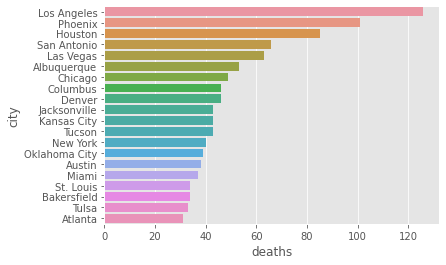

In [168]:
forPlat=df1['city'].value_counts().reset_index().rename(columns={'index':'city','city':'deaths'}).head(20)

sns.barplot(y="city", x="deaths", data=forPlat,
            label="deaths")

In [169]:
import plotly.graph_objects as pgo
forPlat=df1['manner_of_death'].value_counts().reset_index().rename(columns={'index':'manner_of_death','manner_of_death':'count'})

fig = pgo.Figure(pgo.Bar(
    x=forPlat['manner_of_death'],y=forPlat['count'],marker_color='purple'
))
fig.update_layout(title_text='Reason of death',xaxis_title="manner of death",yaxis_title="count",height=750,width=750)
fig.show()

### **Male Vs Female**

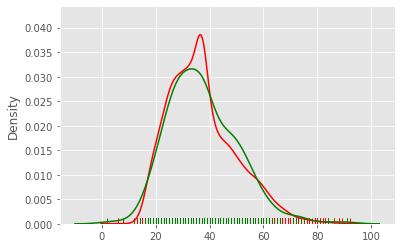

In [170]:
df_male=df1[df1['gender']=='M']['age'].values
df_female=df1[df1['gender']=='F']['age'].values

sns.distplot(df_male, hist=False, rug=True,color='red')
sns.distplot(df_female, hist=False, rug=True,color='green')

### **Signs of mental illness on a bar graph**

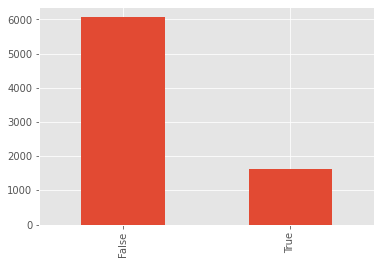

In [171]:
df1['signs_of_mental_illness'].value_counts().plot(kind='bar')

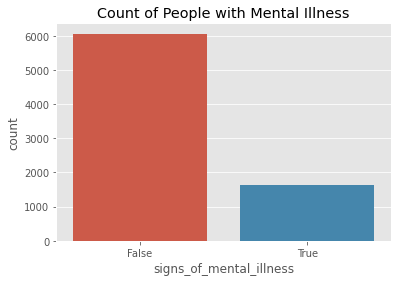

In [172]:
sns.countplot(data=df1,x='signs_of_mental_illness')
plt.title("Count of People with Mental Illness")
plt.show()

The data says, Most of the people didn't have mental Illness.

# **Were the people Fleeing from the area of the incident ?**

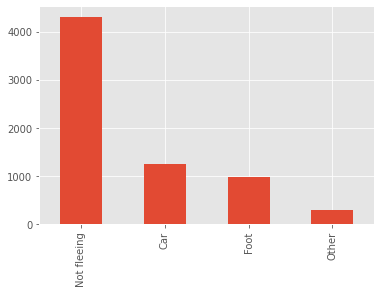

In [173]:
df1['flee'].value_counts().plot(kind='bar')

The Data says, they didn't flee from the site of the incident.

In [174]:
body_camera_footage = df1[['date','body_camera']]

False  6589 True  1093


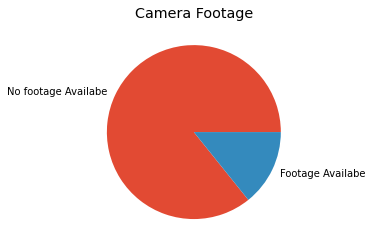

In [175]:
body_camera_true = body_camera_footage.query('body_camera == True')
body_camera_false = body_camera_footage.query('body_camera == False')
print('False ',len(body_camera_false),'True ',len(body_camera_true))
x = ['No footage Availabe','Footage Availabe']
y = [len(body_camera_false),len(body_camera_true)]
plt.pie(y, labels = x)
plt.title(label = 'Camera Footage')
plt.show()

Most of the incidents happen when the Body Cam is OFF/ Not Available.

# **Predict The number of Incidents in the year 2022**

In [176]:
df1['date'].describe()

count           7682
unique          2604
top       2018-06-29
freq               9
Name: date, dtype: object

In [177]:
df1['date'] = pd.to_datetime(df1['date'])

In [178]:
df1['year'] = pd.DatetimeIndex(df1['date']).year

In [179]:
df1['year'].nunique()

8

In [180]:
yearAndCount = pd.DataFrame();

In [181]:
df1['year'].value_counts()

2021    1055
2020    1020
2019     999
2015     994
2018     993
2017     981
2016     958
2022     682
Name: year, dtype: int64

In [182]:
yearAndCount['year'] =  df1['year'].unique()
yearAndCount =  yearAndCount.drop(7)

In [183]:
yearAndCount

,year
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021


In [184]:
x=[]
def yearCount(i):
  print(df1['year'].value_counts()[i])
  x.append(df1['year'].value_counts()[i])
  print(x)

for i in yearAndCount['year']:
  print(i)
  yearCount(i)

yearAndCount = yearAndCount.assign(count = x)

2015
994
[994]
2016
958
[994, 958]
2017
981
[994, 958, 981]
2018
993
[994, 958, 981, 993]
2019
999
[994, 958, 981, 993, 999]
2020
1020
[994, 958, 981, 993, 999, 1020]
2021
1055
[994, 958, 981, 993, 999, 1020, 1055]


In [185]:
yearAndCount['count'].describe()

count       7.000000
mean     1000.000000
std        30.648545
min       958.000000
25%       987.000000
50%       994.000000
75%      1009.500000
max      1055.000000
Name: count, dtype: float64

1046.428571428576


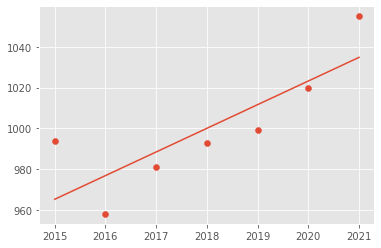

In [186]:
import matplotlib.pyplot as plt
#find line of best fit
a, b = np.polyfit(yearAndCount['year'],yearAndCount['count'] , 1)

#add points to plot
plt.scatter(yearAndCount['year'],yearAndCount['count'])

#add line of best fit to plot
plt.plot(yearAndCount['year'], a*yearAndCount['year']+b)
print(b+2022*a)  

11.607142857159488 -22423.214285747847


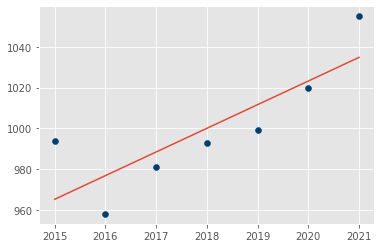

In [187]:
from statistics import mean
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b
m, b = best_fit_slope_and_intercept(yearAndCount['year'],yearAndCount['count'])

print(m,b)
regression_line = [(m*x)+b for x in yearAndCount['year']]


regression_line = []
for x in yearAndCount['year']:
    regression_line.append((m*x)+b)

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


plt.scatter(yearAndCount['year'],yearAndCount['count'],color='#003F72')
plt.plot(yearAndCount['year'], regression_line)
plt.show()

In [188]:
predict_x = 2022
predict_y = (m*predict_x)+b


{'year': 2022, 'count': 1046.428571428638}


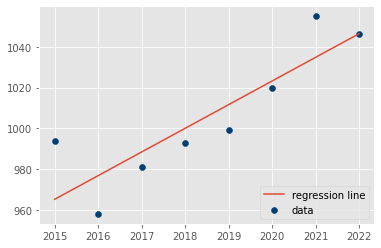

In [189]:
row = {'year': 2022 , 'count':predict_y}
print(row)
yearAndCount = yearAndCount.append(row, ignore_index = True)
regression_line = []
for x in yearAndCount['year']:
    regression_line.append((m*x)+b)
plt.scatter(yearAndCount['year'],yearAndCount['count'],color='#003F72',label='data')
plt.plot(yearAndCount['year'], regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

**As the year 2022 is yet be completed, the number of incidents in the year is less. So I droped the row for year 2022 and then performed 'Regression - to program the Best Fit Line' on the data. Thus found the estimated number of incidents.** As per the results that I got, the count is 1046.